In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# load the movie rating data into a dataframe
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv("./ml-100k/u.data", sep = '\t', header = None, names=rating_header)

In [3]:
rating.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
item_id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
Mean = rating.groupby(by="user_id",as_index=False)['rating'].mean()
Rating_avg = pd.merge(rating,Mean,on='user_id')
Rating_avg['adg_rating']=Rating_avg['rating_x']-Rating_avg['rating_y']
Rating_avg.head()

,user_id,item_id,rating_x,timestamp,rating_y,adg_rating
0,196,242,3,881250949,3.615385,-0.615385
1,196,393,4,881251863,3.615385,0.384615
2,196,381,4,881251728,3.615385,0.384615
3,196,251,3,881251274,3.615385,-0.615385
4,196,655,5,881251793,3.615385,1.384615


In [6]:
# load movie data into a dataframe
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv("./ml-100k/u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)

In [7]:
check = pd.pivot_table(Rating_avg,values='rating_x',index='user_id',columns='item_id')
check.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
final=pd.pivot_table(Rating_avg,values='adg_rating',index='user_id',columns='item_id')
final

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.389706,-0.610294,0.389706,-0.610294,-0.610294,1.389706,0.389706,-2.610294,1.389706,-0.610294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.290323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.709677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.125714,0.125714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.364929,NaN,NaN,NaN,NaN,NaN,-1.635071,0.364929,0.364929,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,1.034739,NaN,NaN,1.034739,1.034739,1.034739,0.034739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,-0.796610,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,0.727273,-0.272727,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Replacing NaN by Movie Average
final_movie = final.fillna(final.mean(axis=0))

# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)



In [10]:
final_movie.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.389706,-0.610294,0.389706,-0.610294,-0.610294,1.389706,0.389706,-2.610294,1.389706,-0.610294,...,-1.147059,-0.137056,-0.45933,-1.45933,-0.211982,-2.121495,-0.121495,-1.121495,0.019337,-0.365931
2,0.290323,-0.253455,-0.406476,-0.029170,-0.206708,0.099592,0.241369,0.370904,0.316282,-1.709677,...,-1.147059,-0.137056,-0.45933,-1.45933,-0.211982,-2.121495,-0.121495,-1.121495,0.019337,-0.365931
3,0.299264,-0.253455,-0.406476,-0.029170,-0.206708,0.099592,0.241369,0.370904,0.316282,0.251461,...,-1.147059,-0.137056,-0.45933,-1.45933,-0.211982,-2.121495,-0.121495,-1.121495,0.019337,-0.365931
4,0.299264,-0.253455,-0.406476,-0.029170,-0.206708,0.099592,0.241369,0.370904,0.316282,0.251461,...,-1.147059,-0.137056,-0.45933,-1.45933,-0.211982,-2.121495,-0.121495,-1.121495,0.019337,-0.365931
5,1.125714,0.125714,-0.406476,-0.029170,-0.206708,0.099592,0.241369,0.370904,0.316282,0.251461,...,-1.147059,-0.137056,-0.45933,-1.45933,-0.211982,-2.121495,-0.121495,-1.121495,0.019337,-0.365931


In [11]:
final_user.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.389706e+00,-6.102941e-01,3.897059e-01,-6.102941e-01,-6.102941e-01,1.389706e+00,3.897059e-01,-2.610294e+00,1.389706e+00,-6.102941e-01,...,2.579636e-16,2.579636e-16,2.579636e-16,2.579636e-16,2.579636e-16,2.579636e-16,2.579636e-16,2.579636e-16,2.579636e-16,2.579636e-16
2,2.903226e-01,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16,-1.709677e+00,...,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16,4.655774e-16
3,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,...,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16,1.151342e-16
4,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,...,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16,2.960595e-16
5,1.125714e+00,1.257143e-01,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16,...,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16,2.131628e-16


In [12]:
# user similarity on replacing NAN by user avg
b = cosine_similarity(final_user)
# np.fill_diagonal(b,1)
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.043411,0.011051,0.059303,0.134514,0.103373,0.110556,0.180891,0.012253,-0.000621,...,0.025835,-0.047952,0.087224,0.007718,0.074378,0.078714,0.067433,0.028790,-0.031270,0.032123
2,0.043411,1.000000,0.013658,-0.017016,0.035770,0.094503,0.089408,0.055640,0.027294,0.097846,...,0.012853,-0.028798,0.056659,0.197835,0.090009,0.032505,0.015053,-0.017344,0.012068,0.039173
3,0.011051,0.013658,1.000000,-0.059638,0.016037,-0.017158,0.016141,0.041177,-0.010093,0.023856,...,0.001615,0.000658,-0.006888,0.036157,-0.018513,-0.006240,-0.023907,0.034414,-0.009187,0.001489
4,0.059303,-0.017016,-0.059638,1.000000,0.007373,-0.053929,-0.025604,0.136046,0.016082,-0.013588,...,0.011895,0.002174,-0.028000,-0.025021,0.022882,-0.005960,0.279818,0.258594,0.064504,-0.019222
5,0.134514,0.035770,0.016037,0.007373,1.000000,0.038484,0.067874,0.140106,0.010195,0.014335,...,0.070014,-0.070821,0.024278,0.038672,0.093567,0.051782,0.029540,0.036234,0.043318,0.099324


In [13]:
# user similarity on replacing NAN by item(movie) avg
cosine = cosine_similarity(final_movie)
# np.fill_diagonal(cosine, 0 )
similarity_with_movie = pd.DataFrame(cosine,index=final_movie.index)
similarity_with_movie.columns=final_user.index
similarity_with_movie.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.843356,0.826035,0.857827,0.764312,0.779988,0.713977,0.853533,0.855259,0.816118,...,0.780533,0.837320,0.818577,0.835780,0.794697,0.851909,0.817304,0.859819,0.831436,0.745902
2,0.843356,1.000000,0.927383,0.956761,0.843712,0.872662,0.804099,0.941021,0.956912,0.933291,...,0.884964,0.946499,0.906733,0.951505,0.885671,0.952297,0.909712,0.961835,0.947336,0.857147
3,0.826035,0.927383,1.000000,0.939980,0.827250,0.852937,0.779676,0.923743,0.939207,0.917426,...,0.867559,0.930667,0.889823,0.926949,0.868076,0.934073,0.892905,0.946320,0.924428,0.839377
4,0.857827,0.956761,0.939980,1.000000,0.855949,0.879266,0.801800,0.959257,0.974333,0.946940,...,0.898505,0.964633,0.919858,0.953728,0.900577,0.967555,0.939123,0.982320,0.963425,0.868326
5,0.764312,0.843712,0.827250,0.855949,1.000000,0.768636,0.706424,0.844057,0.854108,0.829360,...,0.791333,0.837326,0.806724,0.840056,0.797082,0.851854,0.811623,0.858221,0.843267,0.771807


In [14]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [15]:
# 找到前30相像的使用者
sim_user_30_u = find_n_neighbours(similarity_with_user,30)
sim_user_30_u.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
user_id,,,,,,,,,,,,,,,,,,,,,
1,1,773,868,592,880,429,276,916,222,457,...,661,246,886,92,682,648,268,643,933,94
2,2,651,34,310,485,296,329,781,46,743,...,420,209,384,356,460,444,582,33,266,26
3,3,808,687,656,512,783,266,556,220,155,...,841,817,819,150,569,369,546,46,225,345
4,4,35,841,353,940,431,443,626,341,725,...,362,464,105,893,282,552,570,165,717,240
5,5,268,497,276,92,650,868,622,44,22,...,661,429,453,407,748,267,307,308,545,13


In [16]:
# top 30 neighbours for each user
sim_user_30_m = find_n_neighbours(similarity_with_movie,30)
sim_user_30_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
user_id,,,,,,,,,,,,,,,,,,,,,
1,1,225,549,895,266,105,800,594,926,384,...,319,876,628,359,631,400,662,120,376,27
2,2,384,33,849,888,800,171,252,482,651,...,310,549,687,359,544,895,273,400,163,477
3,3,33,810,687,47,191,266,284,155,512,...,783,800,631,926,772,876,547,74,252,728
4,4,849,888,431,827,631,33,800,384,876,...,319,441,926,171,895,273,810,832,784,516
5,5,584,369,728,384,800,571,319,849,565,...,687,252,909,266,171,165,827,513,273,564


In [17]:
def get_user_similar_movies( user1, user2 ):
    common_movies = Rating_avg[Rating_avg.user_id == user1].merge(
    Rating_avg[Rating_avg.user_id == user2],
    on = "item_id",
    how = "inner" )
    return common_movies.merge( movies, on = 'item_id' )

In [18]:
#找出共同評分項目
a = get_user_similar_movies(370,4)
a = a.loc[ : , ['rating_x_x','rating_x_y','title']]
a.head()

,rating_x_x,rating_x_y,title
0,1,5,Liar Liar (1997)
1,3,3,Indiana Jones and the Last Crusade (1989)
2,4,5,Star Wars (1977)


In [19]:
def User_item_score(user,item):
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    c = final_movie.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['user_id'] == user,'rating'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_movie.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [20]:
score = User_item_score(320,158)
print("score (u,i) is",score)

('score (u,i) is', 2.869956712454364)


In [19]:
Rating_avg = Rating_avg.astype({"item_id": str})
Movie_user = Rating_avg.groupby(by = 'user_id')['item_id'].apply(lambda x:','.join(x))

In [20]:
def User_item_score1(user):
    # notna找 非 NAN 值
    Movie_seen_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    d = Movie_user[Movie_user.index.isin(b)]
    l = ','.join(d.values)
    #找出相似的使用者所看過的電影
    Movie_seen_by_similar_users = l.split(',')
    
    #扣除在Movie_seen_by_similar_users中，該使用者已看過的電影。
    Movies_under_consideration = list(set(Movie_seen_by_similar_users)-set(list(map(str, Movie_seen_by_user))))
    Movies_under_consideration = list(map(int, Movies_under_consideration))

    score = []
    
    #預測該用戶對於其他電影的評分，排序後推出前五個高分的電影，推薦給使用者。
    for item in Movies_under_consideration:
        c = final_movie.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        #用戶評分平均值
        avg_user = Mean.loc[Mean['user_id'] == user,'rating'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_with_movie.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'item_id':Movies_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
    Movie_Name = top_5_recommendation.merge(movies, how='inner', on='item_id')
    Movie_Names = Movie_Name.title.values.tolist()
    return Movie_Names

In [21]:
user = 1
predicted_movies = User_item_score1(user)
print(" ")
print("The Recommendations for User Id :1")
print("   ")
for movie in predicted_movies:
    print(movie)

 
The Recommendations for User Id :1
   
Close Shave, A (1995)
Schindler's List (1993)
Titanic (1997)
Casablanca (1942)
Boot, Das (1981)


In [32]:
users.head()

NameError: name 'users' is not defined

In [7]:
users.loc[users['zip_code'] == 'T8H1N']

,user_id,age,gender,occupation,zip_code
73,74,39,M,scientist,T8H1N
633,634,39,M,engineer,T8H1N


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [9]:
# load movie data into a dataframe
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv("./ml-100k/u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)

In [10]:
# remove the video release date (no values)
movies = movies.drop(columns=['video_release_date'])
movies.head()

,item_id,title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
item_id         1682 non-null int64
title           1682 non-null object
release_date    1681 non-null object
IMDb_URL        1679 non-null object
unknown         1682 non-null int64
Action          1682 non-null int64
Adventure       1682 non-null int64
Animation       1682 non-null int64
Children's      1682 non-null int64
Comedy          1682 non-null int64
Crime           1682 non-null int64
Documentary     1682 non-null int64
Drama           1682 non-null int64
Fantasy         1682 non-null int64
Film-Noir       1682 non-null int64
Horror          1682 non-null int64
Musical         1682 non-null int64
Mystery         1682 non-null int64
Romance         1682 non-null int64
Sci-Fi          1682 non-null int64
Thriller        1682 non-null int64
War             1682 non-null int64
Western         1682 non-null int64
dtypes: int64(20), object(3)
memory usage: 302.4+ KB


# Data Transformation and Combination
Some ML approaches expect the data set with numerical values only, the following codes show how to convert catergorical data into numbers

In [12]:
# transfrom the users dataframe with numerical values (excluding zip_code)
users_num = users.copy()
users_num["gender"].replace(['F', 'M'],[0, 1], inplace=True) # replace F and M with 0 and 1, respectively

In [13]:
occupation = pd.read_csv("./ml-100k/u.occupation", header = None)
occupation_list = occupation.values
users_num["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)
users_num.head()

,user_id,age,gender,occupation,zip_code
0,1,24,1,19,85711
1,2,53,0,13,94043
2,3,23,1,20,32067
3,4,24,1,19,43537
4,5,33,0,13,15213


In [14]:
users_num = users_num.drop(columns=['user_id','zip_code'])
print(users_num)

     age  gender  occupation
0     24       1          19
1     53       0          13
2     23       1          20
3     24       1          19
4     33       0          13
..   ...     ...         ...
938   26       0          18
939   32       1           0
940   20       1          18
941   48       0          10
942   22       1          18

[943 rows x 3 columns]


In [15]:
# data aggregation
average_rating = rating[["item_id", "rating"]].groupby("item_id", as_index=False).mean()  # average rating per movie
average_rating.sort_values("rating",ascending=False).head()

,item_id,rating
813,814,5.0
1598,1599,5.0
1200,1201,5.0
1121,1122,5.0
1652,1653,5.0


In [16]:
# merge two dataframes (average_rating and movies)
pd.merge(average_rating, movies[["item_id", "title"]])

,item_id,rating,title
0,1,3.878319,Toy Story (1995)
1,2,3.206107,GoldenEye (1995)
2,3,3.033333,Four Rooms (1995)
3,4,3.550239,Get Shorty (1995)
4,5,3.302326,Copycat (1995)
...,...,...,...
1677,1678,1.000000,Mat' i syn (1997)
1678,1679,3.000000,B. Monkey (1998)
1679,1680,2.000000,Sliding Doors (1998)
1680,1681,3.000000,You So Crazy (1994)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48e89e3350>]],
      dtype=object)

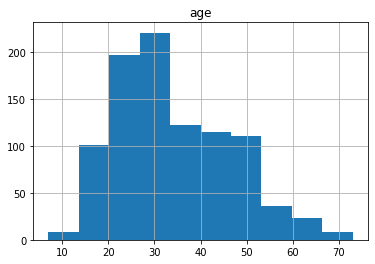

In [17]:
# age intervals distrubution
users.hist(column="age")
#users["age_category"] = pd.cut(users["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[5, 15, 25, 35, 45, 55, 65, 75])
#users["age_category"].hist()

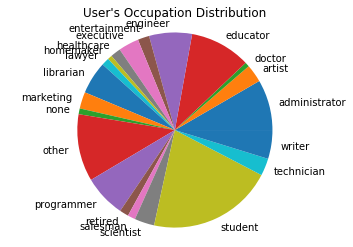

In [18]:
# occupation distrubution
occupation_count = users[["user_id", "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
plt.pie(occupation_count, labels=occupation_count.index.tolist())
plt.title("User's Occupation Distribution")
plt.axis("equal")
plt.show()

<BarContainer object of 2 artists>

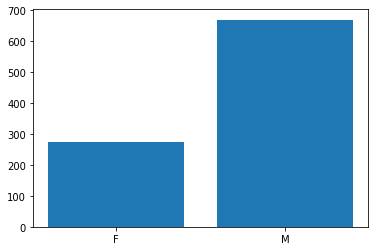

In [19]:
gender_count = users[["user_id", "gender"]].groupby("gender", as_index=False).size()
# print(gender_count.)
plt.bar(gender_count.index.tolist(),gender_count)

# Clustering the movies by genre

In [20]:
cos_sim = cosine_similarity(users_num)
print(cos_sim)

[[1.         0.90885376 0.9989385  ... 0.99799741 0.89368376 0.99986755]
 [0.90885376 1.         0.88871877 ... 0.88064916 0.99938269 0.90196862]
 [0.9989385  0.88871877 1.         ... 0.999845   0.87210522 0.99954733]
 ...
 [0.99799741 0.88064916 0.999845   ... 1.         0.86351248 0.99889116]
 [0.89368376 0.99938269 0.87210522 ... 0.86351248 1.         0.8862923 ]
 [0.99986755 0.90196862 0.99954733 ... 0.99889116 0.8862923  1.        ]]


In [35]:
# assign the id for cosine_df
cosin_df = pd.DataFrame(cos_sim)
item_id_set = np.arange(1,944,1)

# predict the movie for user 

In [83]:
#picked the unwatched movie for user
picked_userid = 1
picked_item_id = 111

In [84]:
cosin_df_six = cosin_df[picked_userid-1]
cosin_df_six.index = item_id_set
cosin_df_six.index.name = 'user_id'
df_six = cosin_df_six.to_frame()
df_six.columns = ['sim']
# cosine = np.dot(A,B)/(norm(A)*norm(B))
print (df_six)

              sim
user_id          
1        1.000000
2        0.908854
3        0.998938
4        1.000000
5        0.956475
...           ...
939      0.997415
940      0.784265
941      0.997997
942      0.893684
943      0.999868

[943 rows x 1 columns]


In [85]:
rating_u = pd.read_csv("./ml-100k/u1.base", sep = '\t', header = None, names=rating_header)
rating_u.head()

,user_id,item_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [86]:
#merge the ratind data and similarity of picked movie
rating_u1 = rating_u[rating_u['item_id']==picked_item_id]

df_merge1 = pd.merge(rating_u1,df_six,left_index=True, right_index=True)
print(df_merge1)

     user_id  item_id  rating  timestamp       sim
59         1      111       5  889751711  0.820569
140        2      111       4  888551853  0.991134
322        6      111       2  883599478  0.997997
938       13      111       5  882140588  0.978337


In [87]:
#calculate rating 
item_sum = 0

for u1_watched_item_id in range(len(df_merge1)):
    sum = df_merge1.iloc[u1_watched_item_id]['rating']*df_merge1.iloc[u1_watched_item_id]['sim']
    print(sum)
    item_sum +=sum

similartiy_sum = df_merge1['sim'].sum()
predict_rating = round(item_sum/df_merge1['sim'].sum())
print("final rate : ",predict_rating)

4.102845278154163
3.9645361292565626
1.9959948132356562
4.891683905218266
final rate :  4.0
